Article: https://www.embedded-robotics.com/\
Code: Image Classification using Convolution Neural Network\
Prepared By: Awais Naeem (awais.naeem@embedded-robotics.com)\
Copyrights: www.embedded-robotics.com\
Disclaimer: This code can be distributed with the proper mention of the owner copyrights

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.utils.data as torch_data
import torch.optim as optim
from sklearn.metrics import accuracy_score

Fashion MNIST Data: https://www.kaggle.com/datasets/zalando-research/fashionmnist

In [2]:
home = os.path.expanduser('~')

In [3]:
train_path = os.path.join(home,'.torch/datasets/fashion/fashion-mnist_train.csv')
test_path = os.path.join(home,'.torch/datasets/fashion/fashion-mnist_test.csv')

In [4]:
train_data = pd.read_csv(train_path)
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_data = pd.read_csv(test_path)
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_X = train_data.iloc[:,1:]
train_y = train_data['label']
test_X = test_data.iloc[:,1:]
test_y = test_data['label']

In [7]:
train_X = train_X.to_numpy()
train_y = train_y.to_numpy()
test_X = test_X.to_numpy()
test_y = test_y.to_numpy()

In [8]:
print('Train X:', train_X.shape)
print('Train y:', train_y.shape)
print('Test X:', test_X.shape)
print('Test y:', test_y.shape)

Train X: (60000, 784)
Train y: (60000,)
Test X: (10000, 784)
Test y: (10000,)


In [9]:
train_X = train_X.reshape(-1,1,28,28)
train_y = train_y.reshape(-1,1)
test_X = test_X.reshape(-1,1,28,28)
test_y = test_y.reshape(-1,1)

In [10]:
print('Train X:', train_X.shape)
print('Train y:', train_y.shape)
print('Train X:', test_X.shape)
print('Train y:', test_y.shape)

Train X: (60000, 1, 28, 28)
Train y: (60000, 1)
Train X: (10000, 1, 28, 28)
Train y: (10000, 1)


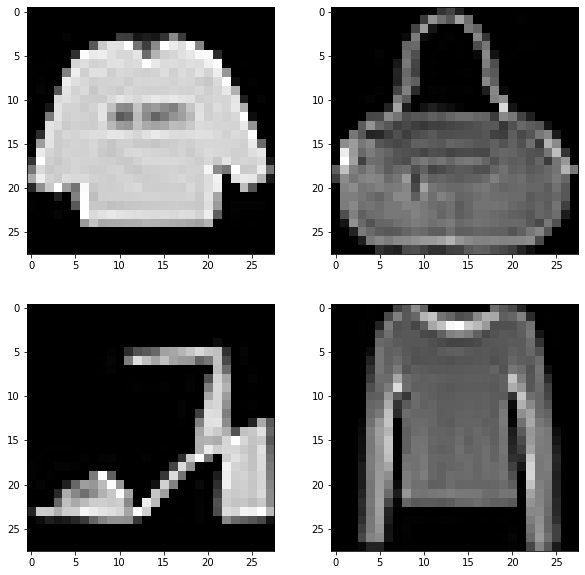

In [11]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(train_X[0][0], cmap='gray')
plt.subplot(222)
plt.imshow(train_X[20][0], cmap='gray')
plt.subplot(223)
plt.imshow(train_X[60][0], cmap='gray')
plt.subplot(224)
plt.imshow(train_X[120][0], cmap='gray')
plt.show()

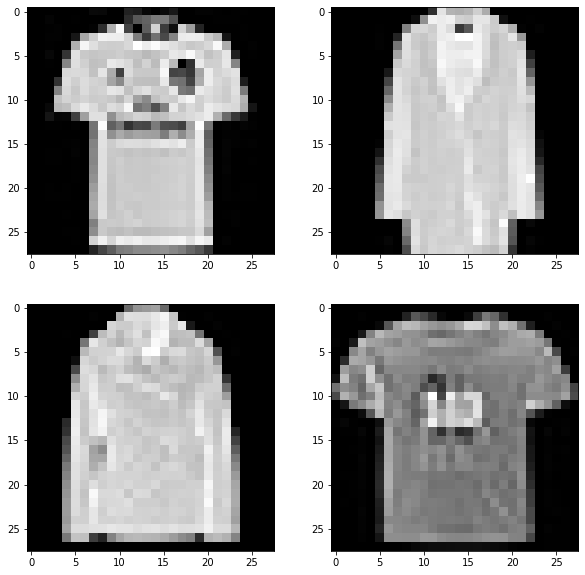

In [12]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(test_X[0][0], cmap='gray')
plt.subplot(222)
plt.imshow(test_X[20][0], cmap='gray')
plt.subplot(223)
plt.imshow(test_X[60][0], cmap='gray')
plt.subplot(224)
plt.imshow(test_X[120][0], cmap='gray')
plt.show()

In [13]:
train_X = train_X/255
test_X = test_X/255

In [14]:
tensor_train_X = torch.from_numpy(train_X).float()
tensor_train_y = torch.from_numpy(train_y).long()
tensor_test_X = torch.from_numpy(test_X).float()
tensor_test_y = torch.from_numpy(test_y).long()

In [15]:
tensor_train_dataset = torch_data.TensorDataset(tensor_train_X, tensor_train_y)
tensor_test_dataset = torch_data.TensorDataset(tensor_test_X, tensor_test_y)

In [16]:
train_dl = torch_data.DataLoader(tensor_train_dataset, batch_size=128, shuffle=True)
test_dl = torch_data.DataLoader(tensor_test_dataset, batch_size=32, shuffle=False)

Using LeNet Architecture for Deep Learning Model

Image Size Calculation: [(W-K+2P)/S] + 1; W = Width of Input Image, K = Kernel Size, P = Padding, S = Stride

In [17]:
class LeNet (nn.Module):
    def __init__ (self, n_channels, classes):
        super(LeNet, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=n_channels, out_channels=20, kernel_size=(5,5)) #20*24*24
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)) ##20*12*12
        
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=(5,5)) #50*8*8
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)) #50*4*4
        
        self.fc1 = nn.Linear(in_features=800, out_features=512)
        self.relu3 = nn.ReLU()

        self.fc2 = nn.Linear(in_features=512, out_features=128)
        self.relu4 = nn.ReLU()
        
        self.fc3 = nn.Linear(in_features=128, out_features=classes)
        self.Softmax = nn.Softmax(dim=1)
    
    def forward (self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        
        x = x.view(-1,4*4*50)

        x = self.fc1(x)
        x = self.relu3(x)

        x = self.fc2(x)
        x = self.relu4(x)
        
        x = self.fc3(x)
        output = self.Softmax(x)
        
        return output

In [27]:
def train_model(model, train_dl, learning_rate, epochs):
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    for epoch in range(epochs):
        
        model.train()
        
        totalTrainLoss = 0;
        train_steps = 0;
        
        for (inputs, targets) in train_dl:
            optimizer.zero_grad()
            yhat = model(inputs)
            loss = criterion(yhat,targets.squeeze())
            loss.backward()
            optimizer.step()
            
            totalTrainLoss = totalTrainLoss + loss
            train_steps = train_steps + 1

        avgTrainLoss = totalTrainLoss.detach().numpy()/train_steps
        print('[EPOCH {}] -> Training Loss: [{}]'.format(epoch, avgTrainLoss))
        

In [28]:
model = LeNet(1, 10)

In [29]:
train_model(model, train_dl, learning_rate=0.001, epochs=30)

[EPOCH 0] -> Training Loss: [1.7532234110557703]
[EPOCH 1] -> Training Loss: [1.6391868347298109]
[EPOCH 2] -> Training Loss: [1.6103164249900053]
[EPOCH 3] -> Training Loss: [1.599004489272388]
[EPOCH 4] -> Training Loss: [1.5873098149736806]
[EPOCH 5] -> Training Loss: [1.5811265241871002]
[EPOCH 6] -> Training Loss: [1.5744820210471082]
[EPOCH 7] -> Training Loss: [1.5685102060151253]
[EPOCH 8] -> Training Loss: [1.5636130782332756]
[EPOCH 9] -> Training Loss: [1.560588389317364]
[EPOCH 10] -> Training Loss: [1.556947362448361]
[EPOCH 11] -> Training Loss: [1.5556109658182302]
[EPOCH 12] -> Training Loss: [1.5523997878214952]
[EPOCH 13] -> Training Loss: [1.5492922004097816]
[EPOCH 14] -> Training Loss: [1.549346858758662]
[EPOCH 15] -> Training Loss: [1.5459363079274386]
[EPOCH 16] -> Training Loss: [1.5446252883878597]
[EPOCH 17] -> Training Loss: [1.5432200482659248]
[EPOCH 18] -> Training Loss: [1.54026381242504]
[EPOCH 19] -> Training Loss: [1.5398498405017325]
[EPOCH 20] -> Tr

In [30]:
def evaluate_model(model, test_dl):
    
    with torch.no_grad():
        model.eval()
        predictions, actuals = list(), list()
        for (inputs, targets) in test_dl:
            yhat = model(inputs)
            yhat = yhat.detach().numpy()
            yhat = np.argmax(yhat, axis=1)
            yhat = yhat.reshape(-1,1)
            actual = targets.numpy()
            actual = actual.reshape(-1,1)
            predictions.append(yhat)
            actuals.append(actual)
        predictions, actuals = np.vstack(predictions), np.vstack(actuals)
        return accuracy_score(actuals, predictions)
        

In [34]:
train_accuracy = evaluate_model(model, train_dl)
print('Train Data Accuracy: {}%'.format(train_accuracy*100))

Train Data Accuracy: 92.69%


In [35]:
test_accuracy = evaluate_model(model, test_dl)
print('Test Data Accuracy: {}%'.format(test_accuracy*100))

Test Data Accuracy: 89.69%
